# Week 2 - 9th August, 2023

Use the Bollywood Dataset to Answer Questions 1 to 12.

In [3]:
import pandas as pd
bollywood_df = pd.read_csv('./datasets/bollywood.csv')
bollywood_df.head(5)

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


In [8]:
import warnings
warnings.filterwarnings('ignore')

### Q1. How many records are present in the dataset? Print the metadata information of the dataset.

In [9]:
len(bollywood_df)

149

### Q2. How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order.

In [10]:
# movies release in each genre
bollywood_df['Genre'].value_counts()

Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: count, dtype: int64

In [11]:
# genre with the highest number of releases
bollywood_df['Genre'].value_counts().sort_values(ascending=False).head(1)

Genre
Comedy    36
Name: count, dtype: int64

In [12]:
# descending list of releases grouped by genre
bollywood_df['Genre'].value_counts().sort_values(ascending=False)

Genre
Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Thriller      3
Action        3
Name: count, dtype: int64

### Q3. How many movies in each genre got released in different release times like long weekend, festive season, etc.
(Hint: Do a cross tabulation between `Genre` and `ReleaseTime`.)

In [13]:
pd.crosstab(bollywood_df['Genre'], bollywood_df['ReleaseTime'])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


### Q4. Which month of the year, maximum number movie releases are seen?
(Hint: Extract a new column called `month` from `ReleaseDate` column.)

In [14]:
bollywood_df['Month'] = bollywood_df['ReleaseDate'].map(lambda date: date.split('-')[1])
bollywood_df.groupby('Month').size().sort_values(ascending=False).head(1)

Month
Jan    20
dtype: int64

### Q5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more?

In [15]:
bollywood_df['Month'] = bollywood_df['ReleaseDate'].map(lambda date: date.split('-')[1])
bollywood_df[bollywood_df['Budget'] >= 25].groupby('Month').size().sort_values(ascending=False).head(1)

Month
Feb    9
dtype: int64

### Q6. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as `(BoxOfficeCollection – Budget) / Budget`.

In [16]:
roi = []
for i, row in bollywood_df.iterrows():
    roi.append((row['BoxOfficeCollection'] - row['Budget'])/row['Budget'])
bollywood_df['ROI'] = roi
bollywood_df.sort_values(by='ROI', ascending=False).head(10)

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,ROI,Month
64,65,26-Apr-13,Aashiqui 2,N,Romance,12,110.0,2926673,4944,628,8.166667,Apr
89,90,19-Dec-14,PK,HS,Drama,85,735.0,13270623,43767,5693,7.647059,Dec
132,133,13-Sep-13,Grand Masti,LW,Comedy,35,298.0,1795640,3015,721,7.514286,Sep
135,136,20-Sep-13,The Lunchbox,N,Drama,10,85.0,1064854,4054,285,7.500000,Sep
87,88,14-Jun-13,Fukrey,N,Comedy,5,36.2,227912,222,39,6.240000,Jun
58,59,5-Sep-14,Mary Kom,N,Drama,15,104.0,6086811,26560,1647,5.933333,Sep
128,129,18-Oct-13,Shahid,FS,Drama,6,40.0,1148516,3155,396,5.666667,Oct
37,38,11-Jul-14,Humpty Sharma Ki Dulhania,N,Romance,20,130.0,6604595,14535,2208,5.500000,Jul
101,102,12-Jul-13,Bhaag Milkha Bhaag,N,Drama,30,164.0,2635390,4622,456,4.466667,Jul
115,116,9-Aug-13,Chennai Express,FS,Comedy,75,395.0,1882346,7954,1593,4.266667,Aug


### Q7. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times.

In [17]:
roi = []
for i, row in bollywood_df.iterrows():
    roi.append((row['BoxOfficeCollection'] - row['Budget'])/row['Budget'])
bollywood_df['ROI'] = roi
bollywood_df.sort_values(by='ROI', ascending=False).head(10)
bollywood_df.groupby('ReleaseTime')['ROI'].mean()

ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

### Q8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot to conclude if the most movies are high or low budgeted movies.

(array([64., 40., 19., 11.,  4.,  4.,  2.,  2.,  1.,  2.]),
 array([  2. ,  16.8,  31.6,  46.4,  61.2,  76. ,  90.8, 105.6, 120.4,
        135.2, 150. ]),
 <BarContainer object of 10 artists>)

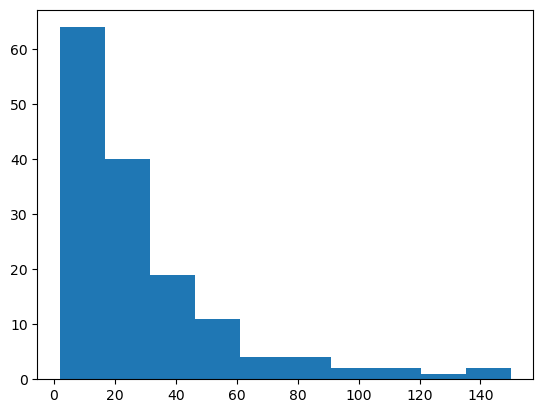

In [18]:
import matplotlib.pyplot as plt
plt.hist(bollywood_df['Budget'])

<Axes: xlabel='Budget', ylabel='Density'>

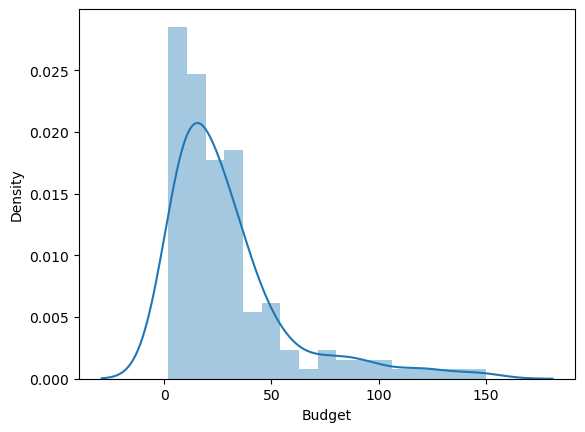

In [19]:
import seaborn as sn
sn.distplot(bollywood_df['Budget'])

### Q9. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs?

In [20]:
roi = []
for i, row in bollywood_df.iterrows():
    roi.append((row['BoxOfficeCollection'] - row['Budget'])/row['Budget'])
bollywood_df['ROI'] = roi
bollywood_df.head(5)

,SlNo,ReleaseDate,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,ROI,Month
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527,1.888889,Apr
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137,0.200000,Jan
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54,-0.600000,Jul
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,-0.950000,Jan
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224,-0.400000,Jul


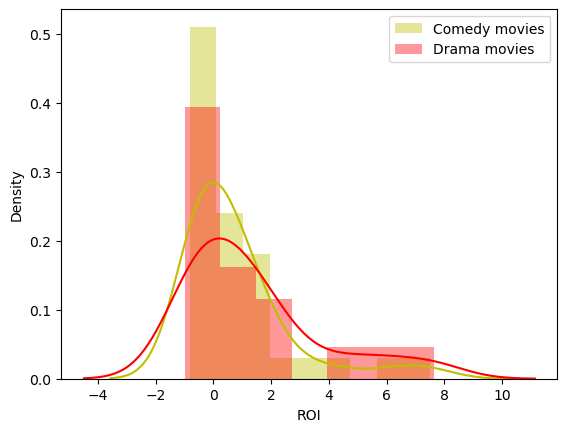

In [21]:
import matplotlib.pyplot as plt
import seaborn as sn

sn.distplot(
    bollywood_df[bollywood_df['Genre'] == 'Comedy']
    ['ROI'],
    color='y',
    label='Comedy movies'
)

sn.distplot(
    bollywood_df[bollywood_df['Genre'] == ' Drama ']
    ['ROI'],
    color = 'r',
    label = 'Drama movies'
)

plt.legend()

### Q10. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?

In [22]:
bollywood_df['YoutubeLikes'].corr(bollywood_df['BoxOfficeCollection'])

0.6825165877731297

### Q11. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare.

<Axes: title={'center': 'YoutubeLikes'}, xlabel='Genre'>

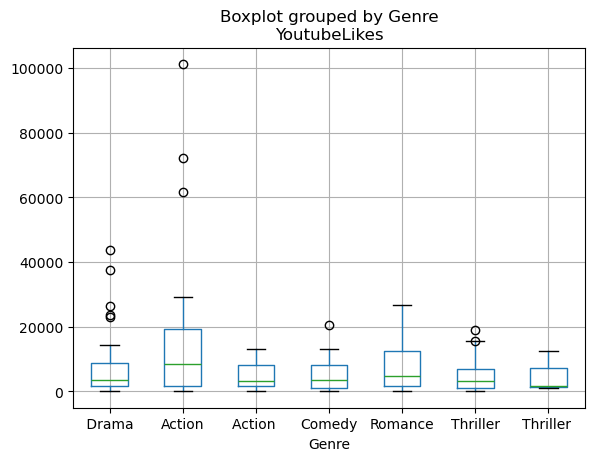

In [24]:
bollywood_df.boxplot(by='Genre', column=['YoutubeLikes'])

### Q12. Which of the variables among `Budget`, `BoxOfficeCollection`, `YoutubeView`, `YoutubeLikes`, `YoutubeDislikes` are highly correlated?
Note: Draw pair plot or heatmap.

<Axes: >

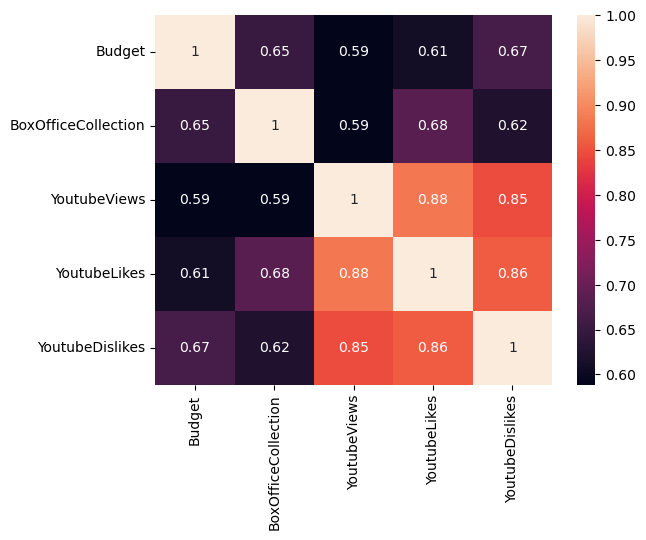

In [25]:
features = ['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']
sn.heatmap(bollywood_df[features].corr(), annot=True)